<a href="https://colab.research.google.com/github/shanikairoshi/QML-and-Deep-Unfolded_QML/blob/main/D_VQC_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

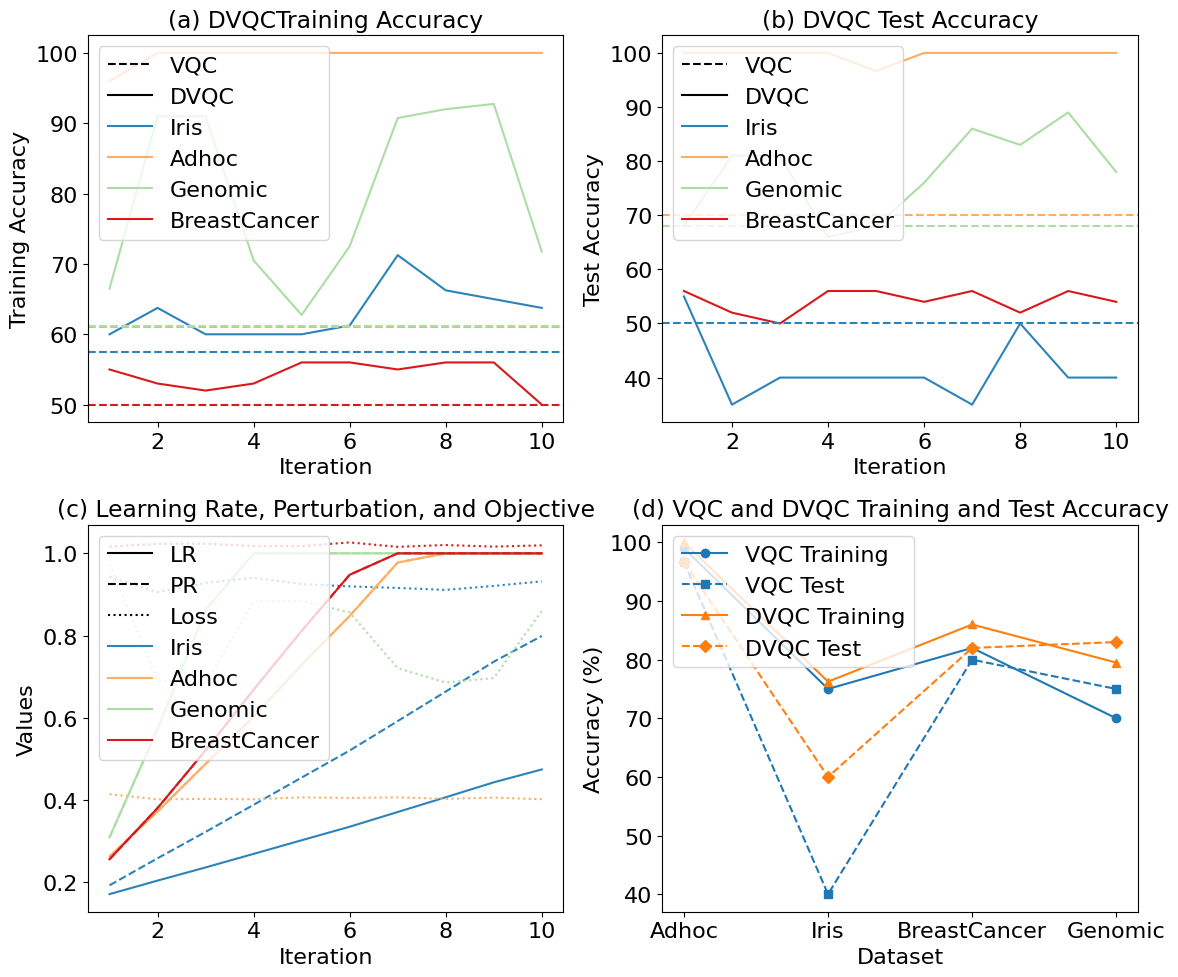

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
iris_df = pd.read_csv('/content/training_results_IrisDVQC.csv')
adhoc_df = pd.read_csv('/content/training_results_AdhocDVQC.csv')
genomic_df = pd.read_csv('/content/training_results_GenomicDVQC.csv')
breastcancer_df = pd.read_csv('/content/trainig_results_BreastcancerDVQC.csv')

# Dictionary to hold the dataframes
datasets_dict = {
    "Iris": iris_df,
    "Adhoc": adhoc_df,
    "Genomic": genomic_df,
    "BreastCancer": breastcancer_df
}

# Define colors for each dataset (muted, professional palette)
colors = {
    "Iris": "#2b83ba",          # blue
    "Adhoc": "#fdae61",         # orange
    "Genomic": "#abdda4",       # green
    "BreastCancer": "#d7191c"   # red
}

# Create subplots for a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Increase the overall font size for axis tick labels
plt.rcParams.update({'font.size': 14})

import matplotlib.lines as mlines

# Proxy lines for the legend (QNN and DQNN distinction)
qnn_line = mlines.Line2D([], [], color='black', linestyle='--', label='VQC')
dqnn_line = mlines.Line2D([], [], color='black', linestyle='-', label='DVQC')

# Plot 1: Training Accuracy (a)
for dataset_name, df in datasets_dict.items():
    axs[0, 0].plot(df['Iteration'], df['Training Accuracy'], label=f'{dataset_name}', color=colors[dataset_name])  # Simplified legend
axs[0, 0].axhline(y=57.5, color=colors["Iris"], linestyle='--')
axs[0, 0].axhline(y=61, color=colors["Adhoc"], linestyle='--')
axs[0, 0].axhline(y=61.25, color=colors["Genomic"], linestyle='--')
axs[0, 0].axhline(y=50, color=colors["BreastCancer"], linestyle='--')
axs[0, 0].set_title('(a) DVQCTraining Accuracy')
axs[0, 0].set_xlabel('Iteration', fontsize=16)
axs[0, 0].set_ylabel('Training Accuracy', fontsize=16)
# Add the proxy lines and dataset legends
axs[0, 0].legend(handles=[qnn_line, dqnn_line] + axs[0, 0].get_legend_handles_labels()[0], loc='upper left', fontsize=16)
axs[0, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 2: Test Accuracy (b)
for dataset_name, df in datasets_dict.items():
    axs[0, 1].plot(df['Iteration'], df['Test Accuracy'], label=f'{dataset_name}', color=colors[dataset_name])  # Simplified legend
axs[0, 1].axhline(y=50, color=colors["Iris"], linestyle='--')
axs[0, 1].axhline(y=70, color=colors["Adhoc"], linestyle='--')
axs[0, 1].axhline(y=68, color=colors["Genomic"], linestyle='--')
axs[0, 1].set_title('(b) DVQC Test Accuracy')
axs[0, 1].set_xlabel('Iteration', fontsize=16)
axs[0, 1].set_ylabel('Test Accuracy', fontsize=16)
# Add the proxy lines and dataset legends
axs[0, 1].legend(handles=[qnn_line, dqnn_line] + axs[0, 1].get_legend_handles_labels()[0], loc='upper left', fontsize=16)
axs[0, 1].tick_params(axis='both', which='major', labelsize=16)



# Proxy lines for the legend to indicate LR, PR, and OFV distinction
lr_line = mlines.Line2D([], [], color='black', linestyle='-', label='LR')
pr_line = mlines.Line2D([], [], color='black', linestyle='--', label='PR')
ofv_line = mlines.Line2D([], [], color='black', linestyle=':', label='Loss')

# Plot 3: Learning Rate, Perturbation Rate, and Objective Function (c)
for dataset_name, df in datasets_dict.items():
    axs[1, 0].plot(df['Iteration'], df['Learning Rate'], color=colors[dataset_name], linestyle='-')  # No label to avoid repetition
    axs[1, 0].plot(df['Iteration'], df['Perturbation'], color=colors[dataset_name], linestyle='--')  # No label to avoid repetition
    axs[1, 0].plot(df['Iteration'], df['Objective Function Value'], color=colors[dataset_name], linestyle=':')  # No label to avoid repetition

# Add the proxy lines to the legend for LR, PR, and OFV
axs[1, 0].set_title('(c) Learning Rate, Perturbation, and Objective')
axs[1, 0].set_xlabel('Iteration', fontsize=16)
axs[1, 0].set_ylabel('Values', fontsize=16)

# Add dataset entries to the legend without repeating for each metric
dataset_lines = [mlines.Line2D([], [], color=colors[name], label=name) for name in datasets_dict.keys()]

# Combine the proxy lines for LR, PR, and OFV with the dataset-specific entries
axs[1, 0].legend(handles=[lr_line, pr_line, ofv_line] + dataset_lines, loc='upper left', fontsize=16)

axs[1, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 4: Comparison of QNN and DQNN Accuracy (d)
datasets = ['Adhoc', 'Iris', 'BreastCancer', 'Genomic']
qnn_train_acc = [99, 75, 82, 70]
qnn_test_acc = [96.67, 40, 80, 75]
dqnn_train_acc = [100, 76.25, 86, 79.5]
dqnn_test_acc = [96.67, 60, 82, 83]

# Define colors for QNN and DQNN
colors_acc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for each dataset

# Plot for QNN and DQNN Accuracy
axs[1, 1].plot(datasets, qnn_train_acc, marker='o', linestyle='-', label='VQC Training', color=colors_acc[0])
axs[1, 1].plot(datasets, qnn_test_acc, marker='s', linestyle='--', label='VQC Test', color=colors_acc[0])
axs[1, 1].plot(datasets, dqnn_train_acc, marker='^', linestyle='-', label='DVQC Training', color=colors_acc[1])
axs[1, 1].plot(datasets, dqnn_test_acc, marker='D', linestyle='--', label='DVQC Test', color=colors_acc[1])
axs[1, 1].set_title('(d) VQC and DVQC Training and Test Accuracy')
axs[1, 1].set_xlabel('Dataset', fontsize=16)
axs[1, 1].set_ylabel('Accuracy (%)', fontsize=16)
axs[1, 1].legend(loc='upper left', fontsize=16)
axs[1, 1].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('DVQC_Combined_Figures_a_b_c_d.png', dpi=800)

plt.show()
